# BENFORD'S LAW

Benford's law, also called the Newcomb–Benford law, the law of anomalous numbers, or the first-digit law, is an observation about the frequency distribution of leading digits in many real-life sets of numerical data.

In [ ]:
# Benford for python is a Package in PyPi
pip install benford_py

In [1]:
# Importing Libraries
import pandas as pd
import benford as bf
import numpy as np

## Loading the excel file into a DataFrame
insurancedata = pd.read_csv("Automobile_Insurance") #pandas librabies used to read csv file
#first few rows
insurancedata.head() # Data loading to kernel

,age,policy_state,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_number
0,48,OH,1000,1406.91,466132,MALE,MD,craft-repair,sleeping,husband,...,YES,71610,6510,13020,52080,Saab,92x,2004,YES,521585
1,42,IN,2000,1197.22,468176,MALE,MD,machine-op-inspct,reading,other-relative,...,YES,5070,780,780,3510,Mercedes,E400,2007,YES,342868
2,29,OH,2000,1413.14,430632,FEMALE,PhD,sales,board-games,own-child,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,NO,687698
3,41,IL,2000,1415.74,608117,FEMALE,PhD,armed-forces,board-games,unmarried,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,YES,227811
4,44,IL,1000,1583.91,610706,MALE,Associate,sales,board-games,unmarried,...,NO,6500,1300,650,4550,Accura,RSX,2009,NO,367455


In [2]:
# Benford's initial calculation
insurancedata.rename(columns={'Total claim amount':'total_claim_amount'}, inplace=True) 
insurancedata['p_r'] = insurancedata.total_claim_amount/insurancedata.total_claim_amount.shift()-1        #simple returns
insurancedata['l_r'] = np.log(insurancedata.total_claim_amount/insurancedata.total_claim_amount.shift())  #log returns
insurancedata.head()

,age,policy_state,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_number,p_r,l_r
0,48,OH,1000,1406.91,466132,MALE,MD,craft-repair,sleeping,husband,...,6510,13020,52080,Saab,92x,2004,YES,521585,NaN,NaN
1,42,IN,2000,1197.22,468176,MALE,MD,machine-op-inspct,reading,other-relative,...,780,780,3510,Mercedes,E400,2007,YES,342868,-0.929200,-2.647894
2,29,OH,2000,1413.14,430632,FEMALE,PhD,sales,board-games,own-child,...,7700,3850,23100,Dodge,RAM,2007,NO,687698,5.834320,1.921957
3,41,IL,2000,1415.74,608117,FEMALE,PhD,armed-forces,board-games,unmarried,...,6340,6340,50720,Chevrolet,Tahoe,2014,YES,227811,0.829726,0.604166
4,44,IL,1000,1583.91,610706,MALE,Associate,sales,board-games,unmarried,...,1300,650,4550,Accura,RSX,2009,NO,367455,-0.897476,-2.277662


The mathematical theory analyzes fraud from the first digit of the dataset with counts 1:9. Therefore, Benford’s law resulted as if it is a genuine dataset, the total count of first digits is in decreasing order for 1:9.

Benford's provided digit combination tests such as first digits, second digits, first two digits, first three digits, and last two-digit tests. Therefore, Various goodness-of-fit measures are available and the most suitable method has to be selected.


Initialized sequence with 998 registries.
First_1_Dig
1    0.199399
2    0.338677
3    0.153307
4    0.086172
5    0.056112
6    0.074148
7    0.047094
8    0.026052
9    0.019038
Name: Found, dtype: float64

Test performed on 998 registries.
Discarded 0 records < 1 after preparation.


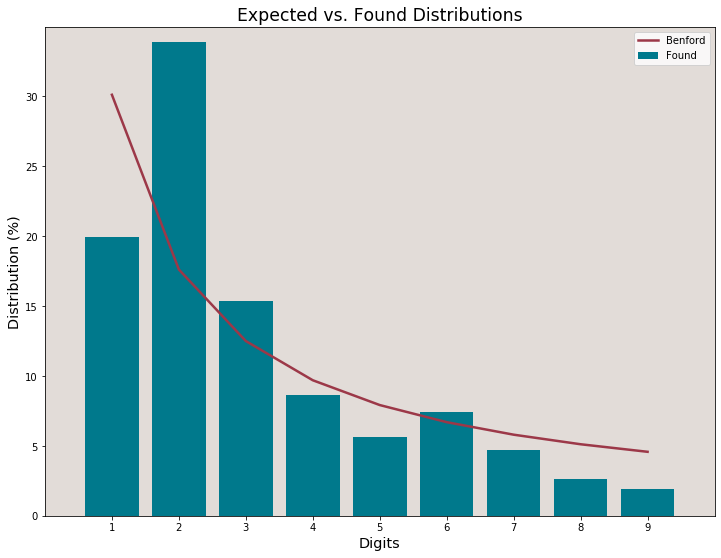

In [4]:
#Firstdigit distribution
firstdigit = bf.first_digits(insurancedata.l_r, digs=1, decimals=8) # digs=1 for the first digit (1-9)
                                                            # Zeros and NANs are dropped before processing.

In [5]:
#Firstdigit values
firstdigit

,Counts,Found,Expected
First_1_Dig,,,
1,199,0.199399,0.301030
2,338,0.338677,0.176091
3,153,0.153307,0.124939
4,86,0.086172,0.096910
5,56,0.056112,0.079181
6,74,0.074148,0.066947
7,47,0.047094,0.057992
8,26,0.026052,0.051153
9,19,0.019038,0.045757



Initialized sequence with 998 registries.
Sec_Dig
0    0.120240
1    0.117234
2    0.126253
3    0.106212
4    0.106212
5    0.102204
6    0.082164
7    0.082164
8    0.074148
9    0.083166
Name: Found, dtype: float64

Test performed on 998 registries.
Discarded 0 records < 10 after preparation.


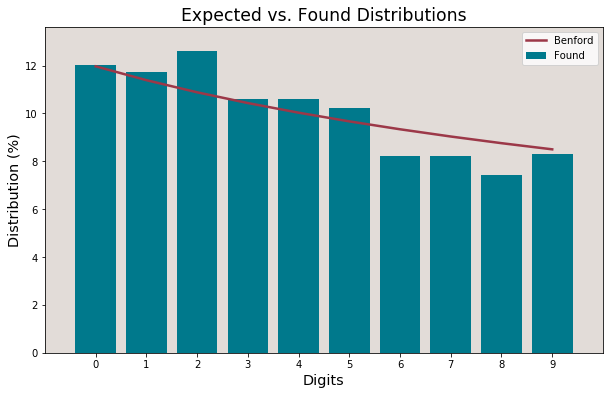

In [12]:
#Seconddigit distribution
seconddigit = bf.second_digit(insurancedata.l_r, decimals=8)

In [13]:
#Seconddigit values
seconddigit

,Counts,Found,Expected
Sec_Dig,,,
0,120,0.120240,0.119679
1,117,0.117234,0.113890
2,126,0.126253,0.108821
3,106,0.106212,0.104330
4,106,0.106212,0.100308
5,102,0.102204,0.096677
6,82,0.082164,0.093375
7,82,0.082164,0.090352
8,74,0.074148,0.087570


In [10]:
benf = bf.Benford((insurancedata, 'l_r'), decimals=8)


 ########## Benford Object Instantiated ########### 

Initial sample size: 1000.

Test performed on 998 registries.

Number of discarded entries for each test:
{'F1D': 0, 'F2D': 0, 'F3D': 0, 'SD': 0, 'L2D': 0}


In [11]:
benf.tests # returns a list will all default tests

['F1D', 'F2D', 'F3D', 'SD', 'L2D']

In [11]:
benf.data.head()

,age,policy_state,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_number,p_r,l_r
0,48,OH,1000,1406.91,466132,MALE,MD,craft-repair,sleeping,husband,...,6510,13020,52080,Saab,92x,2004,YES,521585,NaN,NaN
1,42,IN,2000,1197.22,468176,MALE,MD,machine-op-inspct,reading,other-relative,...,780,780,3510,Mercedes,E400,2007,YES,342868,-0.929200,-2.647894
2,29,OH,2000,1413.14,430632,FEMALE,PhD,sales,board-games,own-child,...,7700,3850,23100,Dodge,RAM,2007,NO,687698,5.834320,1.921957
3,41,IL,2000,1415.74,608117,FEMALE,PhD,armed-forces,board-games,unmarried,...,6340,6340,50720,Chevrolet,Tahoe,2014,YES,227811,0.829726,0.604166
4,44,IL,1000,1583.91,610706,MALE,Associate,sales,board-games,unmarried,...,1300,650,4550,Accura,RSX,2009,NO,367455,-0.897476,-2.277662


In [51]:
benf.base.head()

,Seq,ZN,F1D,F2D,F3D,SD,L2D
1,-2.647894,264789391,2,26,264,6,91
2,1.921957,192195690,1,19,192,9,90
3,0.604166,60416613,6,60,604,0,13
4,-2.277662,227766168,2,22,227,2,68
5,2.288642,228864218,2,22,228,2,18


There are some conformity tests to evaluate if the data is studied is a good fit for Benford’s law.  They are the First Digit Test, Second Digit Test, and so on, therefore some statistical tests such as Kolmogorov-Smirnov, Chi-Square are applied and they are compared to critical values to establish conformity or not with Benford’s law.

The Mean Absolute Deviation or MAD states that the average of all absolute deviations between the found proportions and Benford’s expected ones.
According to Benford’s package, the below output range of MAD decides the conformity test for every distribution. Thus it declares the working of Benford’s law and detects the fraud detection in the dataset.
•	0.0000 to 0.008: Close Conformity
•	0.008 to 0.01: Acceptable Conformity
•	0.01 to 0.015: Marginally Acceptable Conformity
•	Above 0.015: Nonconformity


 ###############  First Digit Test  ############### 

Mean Absolute Deviation: 0.044035
MAD > 0.015000: Nonconformity.

For confidence level 95%: 

	Kolmogorov-Smirnov: 0.101631 
	Critical value: 0.043050 -- FAIL

	Chi square: 229.063023 
	Critical value: 15.507000 -- FAIL

	Critical Z-score:1.96.

The entries with the significant positive deviations are:

             Expected     Found    Z_score
First_1_Dig                               
2            0.176091  0.338677  13.443114
3            0.124939  0.153307   2.662476


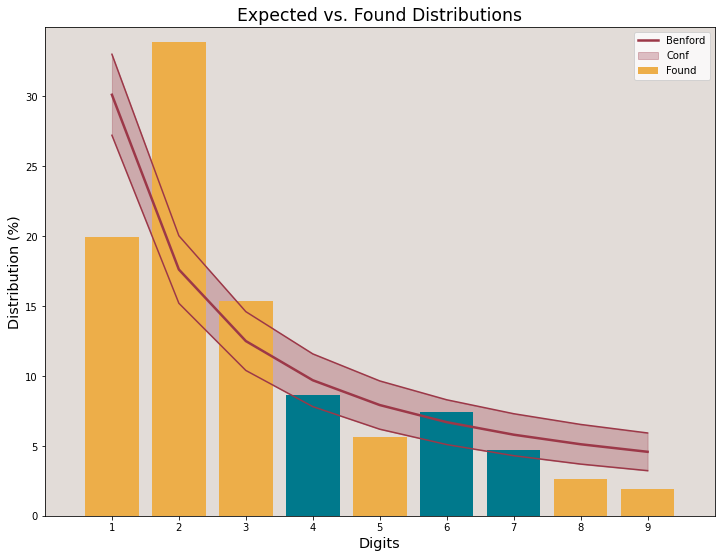

In [52]:
#Benford's tests for the first digit
benf.F1D.report()

In [54]:
benf.update_confidence(99.999, tests=['F2D', 'L2D'])

In [55]:
benf.all_confidences # Note different values for F2D and L2D

{'F1D': 95, 'F2D': 99.999, 'F3D': 95, 'SD': 95, 'L2D': 99.999}


 ##############  Second Digit Test  ############### 

Mean Absolute Deviation: 0.006930
MAD <= 0.008000: Close conformity.

For confidence level 95%: 

	Kolmogorov-Smirnov: 0.034651 
	Critical value: 0.043050 -- PASS

	Chi square: 7.759333 
	Critical value: 16.919000 -- PASS

	Critical Z-score:1.96.

The entries with the significant positive deviations are:

Empty DataFrame
Columns: [Expected, Found, Z_score]
Index: []


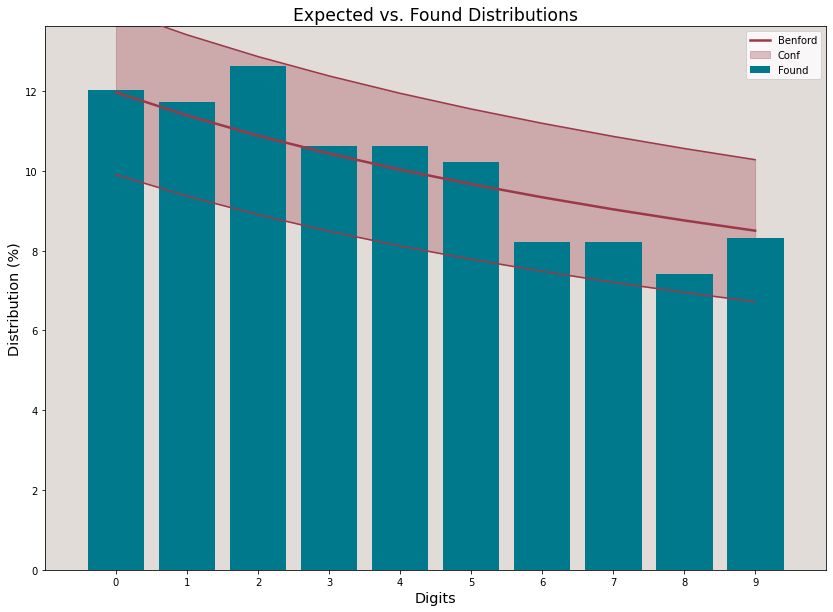

In [58]:
#Benford's tests for the second digit
benf.SD.report()


 #############  Last Two Digits Test  ############# 

Mean Absolute Deviation: 0.002550
There is no conformity check for this test's MAD.

For confidence level 95%: 

	Kolmogorov-Smirnov: 0.033107 
	Critical value: 0.043050 -- PASS

	Chi square: 99.096840 
	Critical value: 123.225000 -- PASS

	Critical Z-score:1.96.

The entries with the significant positive deviations are:

            Expected     Found   Z_score
Last_2_Dig                              
68          0.010101  0.017034  2.032063


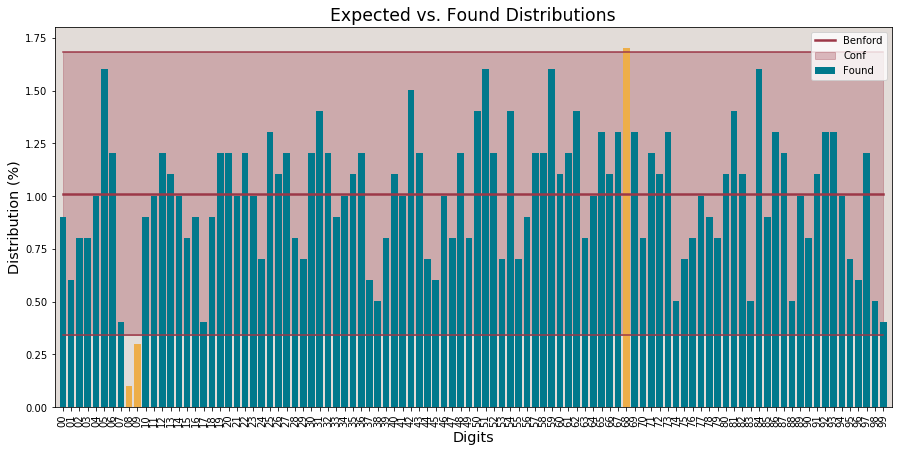

In [14]:
# Benford's last two digits
benf.L2D.report()

# Result Analysis

Therefore, from the results of Benford’s law, it is found that the first digit fractions are not correlated between themselves whereas in the second digit it is correlated themselves. So, based on both analyzes with their tests, it can be concluded that the automobile insurance dataset is not properly supporting Benford’s law and thus they are not naturally originated.